<a href="https://colab.research.google.com/github/bhagirathbhard/BA775_Notebook/blob/nightly/Team_A1_Team_Assignment_10_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **<span style="color:#023e8a;font-size:200%"><center>Indian Startup Funding</center></span>**
## **<center><span style="color:#FEF1FE;background-color:#023e8a;border-radius: 5px;padding: 5px">By: Yicheng Jiang, Bhagirath Bhardwaj, Agnes Shih, Paul Seiters, and Siddharth Bookinkere</span></center>**

# **<a id="Content" style="color:#023e8a;">Table of Content</a>**
* [**<span style="color:#023e8a;">1. Project and Dataset Overview</span>**](#Project-Overview) 
* [**<span style="color:#023e8a;">2. EDA</span>**](#EDA)
* [**<span style="color:#023e8a;">3. Questions and Analysis</span>**](#Questions)
* [**<span style="color:#023e8a;">4. Next Steps</span>**](#NextSteps)

# **<span id="EDA" style="color:#023e8a;">Project and Dataset Overview</span>**

We are an old and very traditional money manager from the USA, investing almost exclusively in the US. After the US economy had lost a lot of its growth trajectory and the FED predicted GDP growth to linger below a mere 2% annually, our clients have been running from our investment products. Where are they all going? After booking a tee time with one of our long-time clients, we heard some adolescents with smartphones talking about the start-up scene in India. There were wild tales about startups with valuations beyond $1B, called unicorns. Apparently, there was not a hint of a slowing economy over there. Is it time to go international? After multiple people confirmed the start-up hype in India, we concluded that it is time to get ourselves a snapshot of what is going on in India. Who is investing? Where are they investing? And most importantly, which companies are they investing in? As a team, we perform data cleaning, exploratory data analysis, and finally, create a visualization in Tableau. Also, we chose the Indian Startup Funding dataset collected from multiple sources because of the varied types of funding covered, the sizable number of observations, and the time coverage from 2015 until May 2022, including the Covid-19 phase.

1.   Indian Startup Funding & Investment Chart [2021] (Trak.in link)
2.   Indian Startups - Funding & Investors Data [2018-2021] (Kaggle link)
3.   Indian Startup Funding & Investment Chart [2021] (Trak.in link)
4.   Indian Startups - Funding Data [2022] (Kaggle link)
5.   Funding details of the startups in India (Kaggle link)
6.   Cleaned Dataset from Github only for Funding calculation purpose and Dates - https://github.com/Satyampd/Startups-in-India-EDA/blob/master/dataset.csv

**In this project 2 datasets created for different purposes; Raw data from Kaggle in India_Funding data cleaning, union, etc.. Funding_Calculation created base on Github data source, for EDA analysis (AVG,SUBSTRING based on Funding, etc..)**

1. `UUID` generated by (GENERATE_UUID()) | Primary Key | Unique | String
2. `Investors` | Multi-values | String
3. `Funding_Year` | DATES 
4. `Company_Brand` | String | Non-Null allowed
5. `Headquarter` | Multi-values | String
6. `Stage` | Multi-values | String
7. `What_it_does` | Multi-values | String
8. `USD_Amount` | Multi-Values | String
9. `Total_USD_Amount` | Calculated based on USD_Amount | Integer *(Data from Github, only for India_All_Year_Funding dataset)

**ERD Diagram**

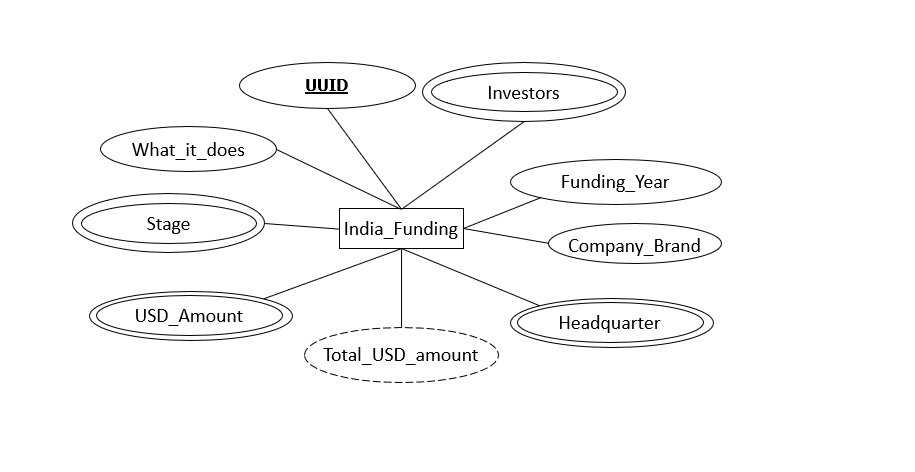

# **<span id="EDA" style="color:#023e8a;">Exploratory Data Analysis (EDA)</span>**

In [55]:
#Connect to Google Big Query
from google.colab import auth
auth.authenticate_user()

Loading dataset by SQL and presenting criteria check for 5k rows and 8 columns.

In [56]:
## Performing (Table Union)
%%bigquery --project=ba775-team-project-a01

WITH Indian_Startup AS(
SELECT Funding_Year,Company_Name,Sector,Location As HeadQuarter,Investor,Stage,USD_Amount,What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2022`
UNION ALL
SELECT Funding_Year,Company_Brand,Sector,HeadQuarter,Investor,Stage,USD_Amount,What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2021`
UNION ALL
SELECT Funding_Year,Company_Brand,Sector,HeadQuarter,Investor,Stage,USD_Amount,What_is_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2020`
UNION ALL
SELECT Funding_Year,Company AS Company_Brand,Sector,HeadQuarter,Investor,Stage,Amount___ AS USD_Amount,What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2019`
UNION ALL
SELECT Funding_Year,Company_Name AS Company_Brand,Industry as Sector,Location as HeadQuarter,Investor,Round AS Stage,USD_Amount,About_Company as What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2018`
UNION ALL
SELECT Funding_Year,Company_Brand,Sector,HeadQuarter,Investor,Stage,_Amount AS USD_Amount,What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2017`
UNION ALL
SELECT Funding_Year,Company_Brand,Sector,HeadQuarter,Investor,Stage,USD_Amount,What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2016`
UNION ALL
SELECT Funding_Year,Company_Brand,Sector,HeadQuarter,Investor,Investment_Type as Stage,USD_Amount,What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2015`
)

SELECT * FROM `Indian_Startup`;

,Funding_Year,Company_Name,Sector,HeadQuarter,Investor,Stage,USD_Amount,What_it_does
0,2019,Nu Genes,AgriTech,Telangana,Innovation in Food and Agriculture (IFA),None,6000000,"It is a seed company engaged in production, pr..."
1,2019,Pumpkart,E-marketplace,Chandigarh,Dinesh Dua,None,Undisclosed,B2B model for appliances and electrical products
2,2019,Smart Institute,Edtech,Surat,HNI investors,None,1500000,A platform to learn online
3,2019,Kratikal,Technology,Uttar pradesh,"Gilda VC, Art Venture, Rajeev Chitrabhanu",Pre-series A,1000000,Provides cyber security solutions
4,2019,Ess Kay Fincorp,Banking,Rajasthan,"TPG, Norwest Venture Partners, Evolvence India",None,33000000,Organised Non-Banking Finance Company
...,...,...,...,...,...,...,...,...
5689,2017,OneStepUp,Technology,New Delhi,Orient BlackSwan,Seed Funding,385000,Education Technology platform
5690,2017,Renew Buy,Consumer Internet,New Delhi,Amicus Capital,Private Equity,311000,Online Insurance Aggregator
5691,2017,ZipLoan,Consumer Internet,New Delhi,"Matrix Partners India, WaterBridge Ventures, W...",Private Equity,275000,SME lending platform
5692,2017,Olly Credit,Technology,New Delhi,"Incubate Fund, Sandesh Kirkire, Anand Kumar, Y...",Seed Funding,243000,Credit + payment mobile app


`5694` rows and `8` columns

Generating a `UUID` as the Primary Key (Identifier) for India Funding Table

In [57]:
%%bigquery --project=ba775-team-project-a01

CREATE OR REPLACE TABLE `ba775-team-project-a01.Indianstartups.India_Funding_AllYear`
AS

SELECT GENERATE_UUID() AS UUID, * 
FROM(
SELECT 
Funding_Year,Company_Name,Sector,Location As HeadQuarter,Investor,Stage,USD_Amount,What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2022`
UNION ALL
SELECT Funding_Year,Company_Brand,Sector,HeadQuarter,Investor,Stage,USD_Amount,What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2021`
UNION ALL
SELECT Funding_Year,Company_Brand,Sector,HeadQuarter,Investor,Stage,USD_Amount,What_is_does AS What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2020`
UNION ALL
SELECT Funding_Year,Company AS Company_Brand,Sector,HeadQuarter,Investor,Stage,Amount___ AS USD_Amount,What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2019`
UNION ALL
SELECT Funding_Year,Company_Name AS Company_Brand,Industry as Sector,Location as HeadQuarter,Investor,Round AS Stage,USD_Amount,About_Company as What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2018`
UNION ALL
SELECT Funding_Year,Company_Brand,Sector,HeadQuarter,Investor,Stage,_Amount AS USD_Amount,What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2017`
UNION ALL
SELECT Funding_Year,Company_Brand,Sector,HeadQuarter,Investor,Stage,USD_Amount,What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2016`
UNION ALL
SELECT Funding_Year,Company_Brand,Sector,HeadQuarter,Investor,Investment_Type as Stage,USD_Amount,What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2015`
);

""


Show output with the `UUID`

In [58]:
%%bigquery --project=ba775-team-project-a01
SELECT * FROM 
`ba775-team-project-a01.Indianstartups.India_Funding_AllYear`
LIMIT 5;

,UUID,Funding_Year,Company_Name,Sector,HeadQuarter,Investor,Stage,USD_Amount,What_it_does
0,3df442bd-61d6-4903-a7ab-acb0fedb7251,2022,Zeta,Financial services,San Francisco,Multiples,None,"30,000,000",Zeta is a modern banking tech company providin...
1,b088cdc5-fd9f-4ff6-afda-a85df87010bf,2020,Arrival,EV startup,"London, England, United Kingdom","UPS Ventures, Hyundai Motor Company",None,"390,000,000",Arrival is a technology company that specializ...
2,2a3b7a47-e19a-4582-b197-8ebb14692c1e,2021,GoTo,Transportation,Ghaziabad,Jesse Lucas,None,"150,000",Real Time Intercity City Transit Platform For ...
3,fd3c315d-983c-4e0b-9147-8644d7194e57,2020,Brighteye Ventures,Edtech,"Paris, Ile-de-France, France",Tandem,None,Undisclosed,Education technology venture capital firm.
4,38f09583-c948-444c-bb08-2b79b2b74126,2021,Sochcast,Sochcast is an Audio experiences company that ...,Online Media\t#REF!,$Undisclosed,None,None,"CA Harvinderjit Singh Bhatia, Garima Surana, A..."


Data Quality issue clean up through UUID

In [59]:
%%bigquery --project=ba775-team-project-a01
SELECT * 
FROM `ba775-team-project-a01.Indianstartups.India_Funding_AllYear`;
## We see the data quality for UUID 1a0b1417-bc0d-410c-9f09-91f00759016b, "Headquarter and Investor" are in wrong location
DELETE FROM `ba775-team-project-a01.Indianstartups.India_Funding_AllYear` WHERE UUID = "1a0b1417-bc0d-410c-9f09-91f00759016b";

""


Checking Funding Year for Null Values

In [60]:
## Check Funding year to be not null

%%bigquery --project=ba775-team-project-a01
WITH Indian_Startup AS(
SELECT Funding_Year,Company_Name,Sector,Location As HeadQuarter,Investor,Stage,USD_Amount,What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2022`
UNION ALL
SELECT Funding_Year,Company_Brand,Sector,HeadQuarter,Investor,Stage,USD_Amount,What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2021`
UNION ALL
SELECT Funding_Year,Company_Brand,Sector,HeadQuarter,Investor,Stage,USD_Amount,What_is_does AS What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2020`
UNION ALL
SELECT Funding_Year,Company AS Company_Brand,Sector,HeadQuarter,Investor,Stage,Amount___ AS USD_Amount,What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2019`
UNION ALL
SELECT Funding_Year,Company_Name AS Company_Brand,Industry as Sector,Location as HeadQuarter,Investor,Round AS Stage,USD_Amount,About_Company as What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2018`
UNION ALL
SELECT Funding_Year,Company_Brand,Sector,HeadQuarter,Investor,Stage,_Amount AS USD_Amount,What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2017`
UNION ALL
SELECT Funding_Year,Company_Brand,Sector,HeadQuarter,Investor,Stage,USD_Amount,What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2016`
UNION ALL
SELECT Funding_Year,Company_Brand,Sector,HeadQuarter,Investor,Investment_Type as Stage,USD_Amount,What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2015`
)

SELECT COUNT(Funding_Year) AS null_count
FROM `Indian_Startup`
WHERE Funding_Year IS NULL;

,null_count
0,0


# **<span id="Questions" style="color:#023e8a;">Questions and Analysis</span>**



**1.   How many startup created are grouped by city?**

In [61]:
%%bigquery --project=ba775-team-project-a01

SELECT CityLocation, COUNT(*) AS Startups FROM `ba775-team-project-a01.indian_startups_cleaned.India_Funding_AllYear`
GROUP BY CityLocation
ORDER BY Startups DESC;

,CityLocation,Startups
0,Bengaluru,578
1,NCR,557
2,Mumbai,392
3,Chennai,75
4,Hyderabad,72
...,...,...
58,Lucknow,1
59,Surat,1
60,Boston,1
61,Delhi & Cambridge,1


**Bengaluru** seems to be doing something great!


**2.   What year had the most amount of start ups funded? What is the overall trend of Start up funding in India?**

In [62]:
%%bigquery --project=ba775-team-project-a01

WITH startup_table AS(
SELECT Funding_Year,Company_Name,Sector,Location As HeadQuarter,Investor,Stage,USD_Amount,What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2022`
UNION ALL
SELECT Funding_Year,Company_Brand,Sector,HeadQuarter,Investor,Stage,USD_Amount,What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2021`
UNION ALL
SELECT Funding_Year,Company_Brand,Sector,HeadQuarter,Investor,Stage,USD_Amount,What_is_does AS What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2020`
UNION ALL
SELECT Funding_Year,Company AS Company_Brand,Sector,HeadQuarter,Investor,Stage,Amount___ AS USD_Amount,What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2019`
UNION ALL
SELECT Funding_Year,Company_Name AS Company_Brand,Industry as Sector,Location as HeadQuarter,Investor,Round AS Stage,USD_Amount,About_Company as What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2018`
UNION ALL
SELECT Funding_Year,Company_Brand,Sector,HeadQuarter,Investor,Stage,_Amount AS USD_Amount,What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2017`
UNION ALL
SELECT Funding_Year,Company_Brand,Sector,HeadQuarter,Investor,Stage,USD_Amount,What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2016`
UNION ALL
SELECT Funding_Year,Company_Brand,Sector,HeadQuarter,Investor,Investment_Type as Stage,USD_Amount,What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2015`
)

SELECT Funding_Year, COUNT(*) AS startups_funded 
FROM startup_table 
GROUP BY Funding_Year
ORDER BY Funding_Year ASC;

,Funding_Year,startups_funded
0,2015,679
1,2016,1018
2,2017,690
3,2018,526
4,2019,89
5,2020,1055
6,2021,1209
7,2022,428


`2020` and `2021` were crazy! it might be interesting also to check what happened so wrong that only `89` startups were funded in `2019`!

**3.   How many Investments were Technology or Tech related? Is there a surge of the tertiary work sector in India? Is the economy shifting from primary and secondary work types to a highly skilled economy?**


In [63]:
%%bigquery --project=ba775-team-project-a01
WITH startup_table AS(
SELECT Funding_Year,Company_Name,Sector,Location As HeadQuarter,Investor,Stage,USD_Amount,What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2022`
UNION ALL
SELECT Funding_Year,Company_Brand,Sector,HeadQuarter,Investor,Stage,USD_Amount,What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2021`
UNION ALL
SELECT Funding_Year,Company_Brand,Sector,HeadQuarter,Investor,Stage,USD_Amount,What_is_does AS What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2020`
UNION ALL
SELECT Funding_Year,Company AS Company_Brand,Sector,HeadQuarter,Investor,Stage,Amount___ AS USD_Amount,What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2019`
UNION ALL
SELECT Funding_Year,Company_Name AS Company_Brand,Industry as Sector,Location as HeadQuarter,Investor,Round AS Stage,USD_Amount,About_Company as What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2018`
UNION ALL
SELECT Funding_Year,Company_Brand,Sector,HeadQuarter,Investor,Stage,_Amount AS USD_Amount,What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2017`
UNION ALL
SELECT Funding_Year,Company_Brand,Sector,HeadQuarter,Investor,Stage,USD_Amount,What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2016`
UNION ALL
SELECT Funding_Year,Company_Brand,Sector,HeadQuarter,Investor,Investment_Type as Stage,USD_Amount,What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2015`
)

SELECT Funding_Year, COUNT(*) AS tech_sector
FROM startup_table
WHERE Sector LIKE "%Tech%" OR Sector LIKE "%Software%" OR Sector LIKE "%analytic%" OR Sector LIKE '%Computer%'
GROUP BY Funding_Year
ORDER BY Funding_Year ASC;

,Funding_Year,tech_sector
0,2015,36
1,2016,194
2,2017,205
3,2018,97
4,2019,10
5,2020,207
6,2021,383
7,2022,87


India seems to have a very heavy bias towards getting startups with technolology getting funded.

**4.   How many Investments were Technology or Tech related? Is there a surge of the tertiary work sector in India? Is the economy shifting from primary and secondary work types to a highly skilled economy?**

**Analysis on Funding**

**5.   Which are the Top 10 Funded Startups in India?**


In [64]:
%%bigquery --project=ba775-team-project-a01
SELECT StartupName, SUM(AmountInUSD) AS Total_Funding FROM `ba775-team-project-a01.indian_startups_cleaned.India_Funding_AllYear`
GROUP BY StartupName
ORDER BY Total_Funding DESC
LIMIT 10;

,StartupName,Total_Funding
0,Flipkart,4759700000
1,Paytm,3348950000
2,Ola,2054200000
3,Pratilipi,1515250000
4,OYO Rooms,972000000
5,Udaan,870000000
6,Snapdeal,700000000
7,BigBasket,507000000
8,Zomato,435000000
9,Byju's,310000000


**Flipkart** seems to be raking in some big bucks these past few years!

**6.   Over the years, what is the average aggregated total amount funding across different sectors, and list out the top 10 sectors?**

In [65]:
%%bigquery --project=ba775-team-project-a01
SELECT IndustryVertical,CAST(SUM(Amount_USD) as INT64) as Sum_of_Fundings
FROM `ba775-team-project-a01.indian_startups_cleaned.Funding_Calculation`
GROUP BY IndustryVertical
ORDER BY Sum_of_Fundings DESC
LIMIT 10;

,IndustryVertical,Sum_of_Fundings
0,eCommerce,7967145717
1,Consumer Internet,6246191934
2,Technology,2225957930
3,Digital Media,1511380200
4,Finance,1322388000
5,FinTech,1199411265
6,Online Marketplace,700143000
7,E-Commerce & M-Commerce platform,680000000
8,B2B,587000000
9,Ecommerce Marketplace,500000000


It comes as no surprise that **eCommerce** (with the role played by Flipkart comes first. In addition, Consumer Internet, Technology seem to be quite near.

**7.   Which investors or investor groups invest mosts number of startups across all years?**

In [66]:
%%bigquery --project=ba775-team-project-a01
SELECT InvestorsName,CAST(SUM(Amount_USD) as INT64) as Sum_of_Fundings,COUNT(*) as Num_of_StartUps_Funded
FROM `ba775-team-project-a01.indian_startups_cleaned.Funding_Calculation`
Where InvestorsName NOT IN ('None','Multiples','Undisclosed Investors')
GROUP BY InvestorsName
Order by Num_of_StartUps_Funded DESC
Limit 10;

,InvestorsName,Sum_of_Fundings,Num_of_StartUps_Funded
0,Sequoia Capital,174850000,12
1,Kalaari Capital,22100000,12
2,Indian Angel Network,6310000,11
3,Info Edge (India) Ltd,10680000,9
4,Accel Partners,114200000,9
5,SAIF Partners,15500000,8
6,Trifecta Capital,18835089,8
7,Brand Capital,53375000,8
8,Venture Catalysts,2900000,7
9,Nexus Venture Partners,28530200,7


**Sequoia Capital** seems to be way ahead of the game with siginificant amount of capital invested into India! Lets see where they invested into!

**8.   List out companies that those top 10 most popular investor invested in.**

In [67]:
%%bigquery --project=ba775-team-project-a01
SELECT InvestorsName,CAST(SUM(Amount_USD) as INT64) as Sum_of_Fundings,COUNT(*) as Num_of_Company_Invested, STRING_AGG(DISTINCT StartupName,"," Order By StartupName ASC) as Investment_Lists
FROM `ba775-team-project-a01.indian_startups_cleaned.Funding_Calculation`
Where InvestorsName not in ('None','Multiples','Undisclosed Investors')
GROUP BY InvestorsName
Order by Num_of_Company_Invested DESC
Limit 10;

,InvestorsName,Sum_of_Fundings,Num_of_Company_Invested,Investment_Lists
0,Sequoia Capital,174850000,12,"Akosha,Chillr,Finova Capital,Goodservice,Homel..."
1,Kalaari Capital,22100000,12,"Advenio,Cashkaro.com,CreditVidya,Cyclops,Guare..."
2,Indian Angel Network,6310000,11,"6Degree,Adytude,Flatpebble,Fourseven,Oneway.ca..."
3,Info Edge (India) Ltd,10680000,9,"BigStylist,Canvera,Diro Labs,HappilyUnmarried,..."
4,Accel Partners,114200000,9,"Agrostar,BrowserStack,Collectabillia,ManageMyS..."
5,SAIF Partners,15500000,8,"Bumper,Cashflo,Gozoomo,Playment,Pulse,SpoonJoy..."
6,Trifecta Capital,18835089,8,"BigBasket,Box8,Cashify,IndustryBuying,Magicpin..."
7,Brand Capital,53375000,8,"AirMed Labs,DoneThing,ExtraCarbon,Faircent.com..."
8,Venture Catalysts,2900000,7,"Beardo,CleanseCar,FYRE,Fynd,GoMechanic,Kalpnik..."
9,Nexus Venture Partners,28530200,7,"Arkin Net,Bolo App,GoPigeon,Goodbox,Livehealth..."


**Sequoia Capital** invested into 

1.   Akosha
2.   Chillr
3.   Finova Capital,
4.   Goodservice,
5.   Homelane,
6.   Kredx,
7.   La Renon,
8.   MedGenome,
9.   NearBuy (previously groupon India),
10.  SirionLabs,
11.  Voonik,
12.  Zoomcar


**Bangaluru** is often called the Silicon Valley of India. Let's review this numerically

**9.  Which start up received the highest funding in Bengaluru?**

In [68]:
%%bigquery --project=ba775-team-project-a01
SELECT StartupName, SUM(Amount_USD) AS Amount_USD
FROM `ba775-team-project-a01.indian_startups_cleaned.Funding_Calculation` 
WHERE CityLocation = 'Bengaluru'
GROUP BY StartupName
ORDER BY Amount_USD DESC;

,StartupName,Amount_USD
0,Flipkart,4759700000
1,Ola,2017200000
2,Paytm,1660000000
3,Pratilipi,1515250000
4,Udaan,870000000
...,...,...
447,Johari Shop,94000
448,Project Mudra,50000
449,Woodpie,30000
450,Strike,22500


**Flipkart** yet again raking it in! It seems pretty clear as well that a lot of big established start ups are based out of Bengaluru. Similar to Silicon Valley.

Seems like many startups are funded with multiple investors. What is the total count of that?

**10.  How many companies have multiple investors?**

In [69]:
%%bigquery --project=ba775-team-project-a01

SELECT StartupName,InvestorsName, SUM(AmountInUSD) AS AmountInUSD FROM `ba775-team-project-a01.indian_startups_cleaned.India_Funding_AllYear`
WHERE InvestorsName LIKE '%,%' OR InvestorsName LIKE '%and%'
GROUP BY StartupName, InvestorsName
ORDER BY AmountInUSD DESC;

,StartupName,InvestorsName,AmountInUSD
0,Flipkart,"Microsoft, eBay, Tencent Holdings",1400000000
1,Flipkart,Steadview Capital and existing investors,700000000
2,Paytm,"Alibaba Group, Ant Financial",680000000
3,Udaan,"Altimeter Capital, DST Global",585000000
4,Snapdeal,"Alibaba, Foxconn, Softbank",500000000
...,...,...,...
900,Medinfi,"Vinod Martin, Hemant Kaul, Prof. Ram Kumar Kak...",50000
901,Medzin,A M Sikander,45000
902,imedilane,"Mahendra Patel, Nilender Chauhan",40000
903,Perfumery,Oranda Global & Others,30000


**Flipkart, Paytm, and Snapdeal** have been getting funded by established investors together such as Microsoft, eBay, Tencent, Alibaba.

There are over `905`+ such startups

What role has Private Equity played in the Indian Start up funding scene?

**11.  Total number of Consumer Internet companies invested in Private Equity?**

In [70]:
%%bigquery --project=ba775-team-project-a01

WITH startup_funding AS(
SELECT Funding_Year,Company_Name,Sector,Location As HeadQuarter,Investor,Stage,USD_Amount,What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2022`
UNION ALL
SELECT Funding_Year,Company_Brand,Sector,HeadQuarter,Investor,Stage,USD_Amount,What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2021`
UNION ALL
SELECT Funding_Year,Company_Brand,Sector,HeadQuarter,Investor,Stage,USD_Amount,What_is_does AS What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2020`
UNION ALL
SELECT Funding_Year,Company AS Company_Brand,Sector,HeadQuarter,Investor,Stage,Amount___ AS USD_Amount,What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2019`
UNION ALL
SELECT Funding_Year,Company_Name AS Company_Brand,Industry as Sector,Location as HeadQuarter,Investor,Round AS Stage,USD_Amount,About_Company as What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2018`
UNION ALL
SELECT Funding_Year,Company_Brand,Sector,HeadQuarter,Investor,Stage,_Amount AS USD_Amount,What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2017`
UNION ALL
SELECT Funding_Year,Company_Brand,Sector,HeadQuarter,Investor,Stage,USD_Amount,What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2016`
UNION ALL
SELECT Funding_Year,Company_Brand,Sector,HeadQuarter,Investor,Investment_Type as Stage,USD_Amount,What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2015`
)

SELECT * FROM startup_funding WHERE Sector = 'Consumer Internet' AND  Stage = 'Private Equity';

,Funding_Year,Company_Name,Sector,HeadQuarter,Investor,Stage,USD_Amount,What_it_does
0,2016,Hike Messenger,Consumer Internet,New Delhi,"Matt Mullenweg, Adam D’Angelo, Aditya Agarwal,...",Private Equity,N/A,P2P Messaging Service
1,2016,Cashkaro,Consumer Internet,Gurgaon,Ratan Tata,Private Equity,N/A,Coupon & Cashback platform
2,2016,Reddoorz,Consumer Internet,New Delhi,500 Startups,Private Equity,N/A,Budget Accomodation Aggregator
3,2016,Little,Consumer Internet,Bangalore,GIC,Private Equity,N/A,Deal Discovery App
4,2016,Turtlemint,Consumer Internet,Mumbai,Nexus Venture Partners,Private Equity,N/A,online personalized insurance platform
...,...,...,...,...,...,...,...,...
355,2017,Fingerlix,Consumer Internet,Bangalore,"Accel Partners, Zephyr Peacock",Private Equity,310000,Food Ordering Portal
356,2017,Bank Bazaar,Consumer Internet,Chennai,Experian,Private Equity,306000,Online Financial Marketplace
357,2017,Toppr,Consumer Internet,Mumbai,"SAIF Partners, Helion Ventures, FIL Capital Ma...",Private Equity,300000,Mobile based learning app
358,2017,ZipLoan,Consumer Internet,New Delhi,"Matrix Partners India, WaterBridge Ventures, W...",Private Equity,275000,SME lending platform


**12.  Did COVID-19 have an impact into the type of industries funded in India?**

In [71]:
%%bigquery --project=ba775-team-project-a01
SELECT IndustryVertical,CAST(SUM(Amount_USD) as INT64) as Sum_of_Fundings
FROM `ba775-team-project-a01.indian_startups_cleaned.Funding_Calculation`
WHERE DATE LIKE '%2020%'
GROUP BY IndustryVertical
ORDER BY Sum_of_Fundings DESC;

,IndustryVertical,Sum_of_Fundings
0,E-Tech,200000000
1,Hospitality,150000000
2,eCommerce,18358860
3,Logistics,9000000
4,Transportation,8048394
5,FinTech,3000000
6,Fashion and Apparel,1800000


As expected a lot of lockdown related industries were heavily funded!

**13.  What is the total amount invested in each sector over the years?**

In [72]:
%%bigquery --project=ba775-team-project-a01
SELECT IndustryVertical,CAST(SUM(AmountInUSD) as INT64) as Sum_of_Fundings
FROM `ba775-team-project-a01.indian_startups_cleaned.India_Funding_AllYear`
GROUP BY IndustryVertical
ORDER BY Sum_of_Fundings DESC;

,IndustryVertical,Sum_of_Fundings
0,eCommerce,7967145717
1,Consumer Internet,6246191934
2,Technology,2225957930
3,Digital Media,1511380200
4,Finance,1322388000
...,...,...
557,Food Ordering & Delivery App,77000
558,Location based Nightlife recommendation\\xc2\\...,77000
559,Developer Portfolio Showcase platform,70000
560,Personalized Wish List creator app,50000


**ECommerce,** likely through Flipkart has maintained a solid lead!

# **<span id="NextSteps" style="color:#023e8a;">Next Steps</span>**

*   Funding in Top 10 funded Ventures might be unrealistic and there might be a data quality issue at hand. Did Alteria Capital really receive 150 Billion in funding? And if that is true, it would hardly still be a startup, right?

*   Catagorizing Funding Stages, 
Various overlapping Stages, None, "Series C,D", "Mid-Series" Likely to be consolidated into -
Angel, Seed Capital, Early Stage Venture(Series A, B, C), Late Stage Ventue, Private Equity, Distressed, Mezzanine, Private/Public High Yield, Senior LBO Debt

In [77]:
#Funding Stages
%%bigquery --project=ba775-team-project-a01
WITH startup_funding AS(
SELECT Funding_Year,Company_Name,Sector,Location As HeadQuarter,Investor,Stage,USD_Amount,What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2022`
UNION ALL
SELECT Funding_Year,Company_Brand,Sector,HeadQuarter,Investor,Stage,USD_Amount,What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2021`
UNION ALL
SELECT Funding_Year,Company_Brand,Sector,HeadQuarter,Investor,Stage,USD_Amount,What_is_does AS What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2020`
UNION ALL
SELECT Funding_Year,Company AS Company_Brand,Sector,HeadQuarter,Investor,Stage,Amount___ AS USD_Amount,What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2019`
UNION ALL
SELECT Funding_Year,Company_Name AS Company_Brand,Industry as Sector,Location as HeadQuarter,Investor,Round AS Stage,USD_Amount,About_Company as What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2018`
UNION ALL
SELECT Funding_Year,Company_Brand,Sector,HeadQuarter,Investor,Stage,_Amount AS USD_Amount,What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2017`
UNION ALL
SELECT Funding_Year,Company_Brand,Sector,HeadQuarter,Investor,Stage,USD_Amount,What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2016`
UNION ALL
SELECT Funding_Year,Company_Brand,Sector,HeadQuarter,Investor,Investment_Type as Stage,USD_Amount,What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2015`
)

SELECT COUNT(DISTINCT Stage) AS No_of_Stages
FROM startup_funding;

,No_of_Stages
0,92


Beyond the above, we are looking to further visualize and identify sectors of growth opportunities in the Indian Startup scene. Potentially identifying areas where we can invest into.

# References



1.   https://www.kaggle.com/code/vanguarde/h-m-eda-first-look - Formatting of the Jupyter Notebook

